In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding

from sklearn.preprocessing import OneHotEncoder,LabelEncoder

import matplotlib.pyplot as plt

In [2]:
# prepare data
king_queen = ['king', 'queen']
kq_symbol = ['a', 'b', 'c']
man_women = ['man', 'women']
wm_symbol = ['d', 'e', 'f']
symbol = list(zip(king_queen * 3, kq_symbol * 2)) + list(zip(man_women * 3, wm_symbol *2))
symbol.extend([('king', 'x'), ('man', 'x'), ('queen', 'y'), ('women', 'y')])
symbol = sorted(symbol, key=lambda x: x[1])
symbol

[('king', 'a'),
 ('queen', 'a'),
 ('queen', 'b'),
 ('king', 'b'),
 ('king', 'c'),
 ('queen', 'c'),
 ('man', 'd'),
 ('women', 'd'),
 ('women', 'e'),
 ('man', 'e'),
 ('man', 'f'),
 ('women', 'f'),
 ('king', 'x'),
 ('man', 'x'),
 ('queen', 'y'),
 ('women', 'y')]

In [3]:
train_data, train_label = zip(*symbol)

In [4]:
train_label

('a',
 'a',
 'b',
 'b',
 'c',
 'c',
 'd',
 'd',
 'e',
 'e',
 'f',
 'f',
 'x',
 'x',
 'y',
 'y')

In [5]:
train_data

('king',
 'queen',
 'queen',
 'king',
 'king',
 'queen',
 'man',
 'women',
 'women',
 'man',
 'man',
 'women',
 'king',
 'man',
 'queen',
 'women')

In [6]:
vocabulary = list(set(train_data) | set(train_label))

In [7]:
vocabulary.sort()
vocabulary

['a', 'b', 'c', 'd', 'e', 'f', 'king', 'man', 'queen', 'women', 'x', 'y']

In [8]:
def one_hot_encoder(word, vocab=vocabulary):
    return [1 if word == w else 0 for w in vocab]

In [9]:
one_hot_encoder('king')

[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [10]:
train_data_encoded = np.array([one_hot_encoder(w) for w in train_data])
train_label_encoded = np.array([one_hot_encoder(l) for l in train_label])

In [11]:
train_data_encoded

array([[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]])

In [12]:
# build model
Dim = 5
V = len(vocabulary)

In [13]:
inputs = Input(shape=(V,), name='input')
x = Dense(Dim, activation='linear', use_bias=False, name='embedding')(inputs)
predict = Dense(V, activation='softmax', use_bias=False, name='dense')(x)
model = Model(inputs=inputs, outputs=predict)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 12)                0         
_________________________________________________________________
embedding (Dense)            (None, 5)                 60        
_________________________________________________________________
dense (Dense)                (None, 12)                60        
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [40]:
# train model
model.compile(optimizer=keras.optimizers.Adagrad(0.07), loss='categorical_crossentropy', metrics=['mse', 'accuracy'])
model.fit(train_data_encoded, train_label_encoded, batch_size=1, epochs=1000)

Epoch 1/1000
16/16 [==============================] - 0s 7ms/sample - loss: 1.6980 - mean_squared_error: 0.0744 - acc: 0.0625
Epoch 2/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.5239 - mean_squared_error: 0.0676 - acc: 0.1875
Epoch 3/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4929 - mean_squared_error: 0.0664 - acc: 0.1250
Epoch 4/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4766 - mean_squared_error: 0.0658 - acc: 0.0000e+00
Epoch 5/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4663 - mean_squared_error: 0.0654 - acc: 0.2500
Epoch 6/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4596 - mean_squared_error: 0.0651 - acc: 0.0625
Epoch 7/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4541 - mean_squared_error: 0.0649 - acc: 0.1250
Epoch 8/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4502 - mean_squared_error: 0.0648 - 

16/16 [==============================] - 0s 2ms/sample - loss: 1.4128 - mean_squared_error: 0.0633 - acc: 0.0000e+00
Epoch 66/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4126 - mean_squared_error: 0.0633 - acc: 0.0000e+00
Epoch 67/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4125 - mean_squared_error: 0.0633 - acc: 0.1250
Epoch 68/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4123 - mean_squared_error: 0.0633 - acc: 0.0625
Epoch 69/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4122 - mean_squared_error: 0.0633 - acc: 0.0000e+00
Epoch 70/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4120 - mean_squared_error: 0.0633 - acc: 0.1250
Epoch 71/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4119 - mean_squared_error: 0.0633 - acc: 0.0625
Epoch 72/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4117 - mean_squared_error: 0.0633 

16/16 [==============================] - 0s 1ms/sample - loss: 1.4037 - mean_squared_error: 0.0630 - acc: 0.0625
Epoch 192/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4036 - mean_squared_error: 0.0630 - acc: 0.0625
Epoch 193/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4036 - mean_squared_error: 0.0630 - acc: 0.0625
Epoch 194/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4036 - mean_squared_error: 0.0630 - acc: 0.0625
Epoch 195/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4035 - mean_squared_error: 0.0630 - acc: 0.0625
Epoch 196/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4035 - mean_squared_error: 0.0630 - acc: 0.0625
Epoch 197/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4035 - mean_squared_error: 0.0630 - acc: 0.0625
Epoch 198/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4034 - mean_squared_error: 0.0630 - acc

16/16 [==============================] - 0s 1ms/sample - loss: 1.4005 - mean_squared_error: 0.0629 - acc: 0.0625
Epoch 318/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4005 - mean_squared_error: 0.0629 - acc: 0.0000e+00
Epoch 319/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4005 - mean_squared_error: 0.0629 - acc: 0.0000e+00
Epoch 320/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4005 - mean_squared_error: 0.0629 - acc: 0.1875
Epoch 321/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4004 - mean_squared_error: 0.0629 - acc: 0.0625
Epoch 322/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4004 - mean_squared_error: 0.0629 - acc: 0.0625
Epoch 323/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4004 - mean_squared_error: 0.0629 - acc: 0.1875
Epoch 324/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.4004 - mean_squared_error: 0.06

16/16 [==============================] - 0s 1ms/sample - loss: 1.3987 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 444/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3987 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 445/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3987 - mean_squared_error: 0.0628 - acc: 0.1250
Epoch 446/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3987 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 447/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3987 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 448/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3986 - mean_squared_error: 0.0628 - acc: 0.0000e+00
Epoch 449/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3986 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 450/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3986 - mean_squared_error: 0.0628 -

16/16 [==============================] - 0s 1ms/sample - loss: 1.3975 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 570/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3975 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 571/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3975 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 572/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3975 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 573/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3975 - mean_squared_error: 0.0628 - acc: 0.1250
Epoch 574/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3974 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 575/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3974 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 576/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3974 - mean_squared_error: 0.0628 - acc

16/16 [==============================] - 0s 1ms/sample - loss: 1.3966 - mean_squared_error: 0.0628 - acc: 0.0000e+00
Epoch 696/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3966 - mean_squared_error: 0.0628 - acc: 0.0000e+00
Epoch 697/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3966 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 698/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3966 - mean_squared_error: 0.0628 - acc: 0.0000e+00
Epoch 699/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3966 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 700/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3966 - mean_squared_error: 0.0628 - acc: 0.0625
Epoch 701/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3965 - mean_squared_error: 0.0628 - acc: 0.1250
Epoch 702/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3965 - mean_squared_error: 

16/16 [==============================] - 0s 1ms/sample - loss: 1.3959 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 822/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3959 - mean_squared_error: 0.0627 - acc: 0.0625
Epoch 823/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3959 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 824/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3959 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 825/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3959 - mean_squared_error: 0.0627 - acc: 0.1250
Epoch 826/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3959 - mean_squared_error: 0.0627 - acc: 0.1250
Epoch 827/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3959 - mean_squared_error: 0.0627 - acc: 0.0625
Epoch 828/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3958 - mean_squared_error: 

16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 947/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 948/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 949/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 950/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared_error: 0.0627 - acc: 0.1250
Epoch 951/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared_error: 0.0627 - acc: 0.0000e+00
Epoch 952/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared_error: 0.0627 - acc: 0.1875
Epoch 953/1000
16/16 [==============================] - 0s 1ms/sample - loss: 1.3953 - mean_squared

In [41]:
#validat
weights = model.get_weights()
embeddings = np.array(weights[0])
embeddings_right = np.array(weights[1]).T

In [42]:
embeddings.shape

(12, 5)

In [43]:
embeddings_right.shape

(12, 5)

In [44]:
word_vec = dict((word, vec) for word, vec in zip(vocabulary, embeddings))

In [45]:
word_vec['king']

array([-1.563953  ,  0.98907673,  0.85600865, -1.9644891 ,  0.6546681 ],
      dtype=float32)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(embeddings)

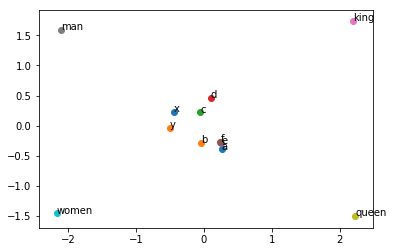

In [48]:
fig, ax = plt.subplots()
for i in range(len(x_pca)):
    term = x_pca[i]
    ax.scatter(term[0], term[1])
    ax.annotate(vocabulary[i], term)

plt.show()

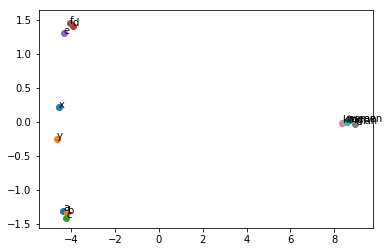

In [49]:
#right vector
fig, ax = plt.subplots()
pca = PCA(n_components=2)
x_pca = pca.fit_transform(embeddings_right)
for i in range(len(x_pca)):
    term = x_pca[i]
    ax.scatter(term[0], term[1])
    ax.annotate(vocabulary[i], term)

plt.show()